* the source of the notebook: 
* https://www.kaggle.com/akashsri99/deep-learning-iris-dataset-keras

## Notebook to train a Keras neural network on the Iris dataset
* the network contains multiple layers
Software needed:
* install anaconda: https://conda.io/docs/user-guide/install/index.html
* install python packages: pandas, seaborn
* install keras: https://keras.io/#installation
* install tensorflow: https://www.tensorflow.org/install/

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data files are available in the "../data" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../data"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [2]:
import matplotlib.pyplot as plt
import os

dataset = pd.read_csv('../data/iris/iris_kaggle.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


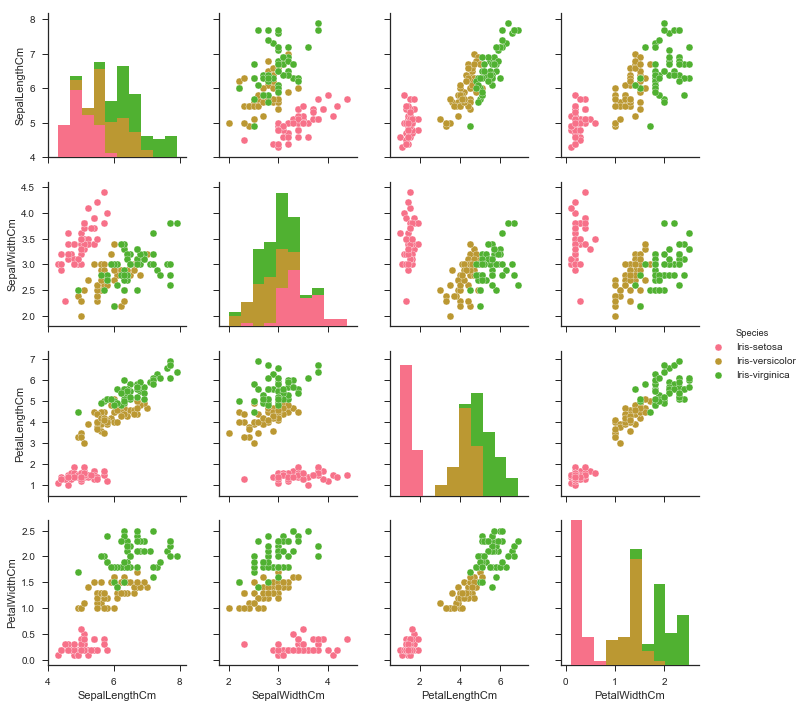

In [3]:

%matplotlib inline

#Plotting the pairwise relationship of different parameters
import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(dataset.iloc[:,1:6],hue="Species")


In [4]:
#Splitting the data into training and test test
X = dataset.iloc[:,1:5].values
y = dataset.iloc[:,5].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 


In [5]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
#from keras.callbacks import TensorBoard

# change .keras/keras.json backend to Mxnet 
model = Sequential()

# Dense(8) is a fully-connected layer with 8 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 4-dimensional vectors.
model.add(Dense(8,input_shape=(4,),activation='tanh'))
model.add(Dense(3,activation='softmax'))
# below part only used without tensorflow backend
# Prepare the list of GPUs to be used in training
#NUM_GPU = 1 # or the number of GPUs available on your machine
#gpu_list = []
#for i in range(NUM_GPU): gpu_list.append('gpu(%d)' % i)
#model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'],context=gpu_list)
model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [6]:
#fitting the model and predicting 
import time

start = time.time()

#model.fit(X_train,y_train,nb_epoch=100, verbose=1, callbacks=[tensorboard])
model.fit(X_train,y_train,nb_epoch=100, verbose=1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)
end = time.time()
print(end - start)


c:\users\monic\anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
120/120 [==============================] - 2s 14ms/step - loss: 0.8915 - acc: 0.6417
Epoch 2/100
120/120 [==============================] - 0s 217us/step - loss: 0.6943 - acc: 0.7000
Epoch 3/100
120/120 [==============================] - 0s 242us/step - loss: 0.5672 - acc: 0.7000
Epoch 4/100
120/120 [==============================] - 0s 318us/step - loss: 0.5036 - acc: 0.9167
Epoch 5/100
120/120 [==============================] - 0s 259us/step - loss: 0.4561 - acc: 0.7667
Epoch 6/100
120/120 [==============================] - 0s 242us/step - loss: 0.4350 - acc: 0.7583
Epoch 7/100
120/120 [==============================] - 0s 259us/step - loss: 0.4001 - acc: 0.9250
Epoch 8/100
120/120 [==============================] - 0s 276us/step - loss: 0.3508 - acc: 0.9500
Epoch 9/100
120/120 [==============================] - 0s 251us/step - loss: 0.3277 - acc: 0.9167
Epoch 10/100
120/120 [==============================] - 0s 234us/step - loss: 0.2897 - acc: 0.9500
Epoch 11/100
120/120

120/120 [==============================] - 0s 201us/step - loss: 0.0737 - acc: 0.9667
Epoch 84/100
120/120 [==============================] - 0s 226us/step - loss: 0.0639 - acc: 0.9833
Epoch 85/100
120/120 [==============================] - 0s 184us/step - loss: 0.0648 - acc: 0.9750
Epoch 86/100
120/120 [==============================] - 0s 259us/step - loss: 0.0886 - acc: 0.9583
Epoch 87/100
120/120 [==============================] - 0s 209us/step - loss: 0.0860 - acc: 0.9667
Epoch 88/100
120/120 [==============================] - 0s 251us/step - loss: 0.1125 - acc: 0.9417
Epoch 89/100
120/120 [==============================] - 0s 251us/step - loss: 0.0893 - acc: 0.9583
Epoch 90/100
120/120 [==============================] - 0s 251us/step - loss: 0.0917 - acc: 0.9583
Epoch 91/100
120/120 [==============================] - 0s 242us/step - loss: 0.0679 - acc: 0.9750
Epoch 92/100
120/120 [==============================] - 0s 201us/step - loss: 0.0598 - acc: 0.9750
Epoch 93/100
120/120 [=

In [7]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.96        13
          2       1.00      0.83      0.91         6

avg / total       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [9]:
# source: https://machinelearningmastery.com/save-load-keras-deep-learning-models/
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
from keras.models import model_from_json
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
acc: 97.33%
